In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [2]:
df = pd.read_csv("pairs_limpieza.csv", index_col = 0)
df.head(2)

,case_number,year,type,country,area,location,activity,name,age,species,injury,fecha_limpia,fatal_limpio,sexo,age_2,type_2
0,1800.00.00,1800,Unprovoked,seychelles,St. Anne,NaN,a corsair's boat was overturned,NaN,27.37,unspecified,"FATAL, all onboard were killed by sharks",unspecified,Y,F,NaN,Unprovoked
1,1797.05.28.R,1797,Unprovoked,unknown,NaN,NaN,Dropped overboard,child,27.37,unspecified,FATAL,May,Y,NaN,NaN,Unprovoked


Vamos a ver cuántos nulos tenemos en nuestro df

In [3]:
df.isnull().sum()

case_number        1
year               0
type               4
country            0
area             453
location         537
activity         540
name             209
age                0
species            0
injury            28
fecha_limpia       0
fatal_limpio       0
sexo             564
age_2           2918
type_2             4
dtype: int64

# Ejercicio 1. Eliminar nulos

- Reemplazad los valores nulos de la columna age por la media de la edad usando el método SimpleImputer.

Sabiendo el número de nulos que tiene la columna age, vamos a prodoceder a reemplazarlos.

In [4]:
df["age_2"].unique()

array([nan, 14., 19., 20., 15., 21., 27., 36., 25.,  6., 16., 50., 57.,
       11., 48., 18., 52., 12., 32., 10., 34., 30., 60., 33., 29., 54.,
       41., 37., 56., 69., 38., 55., 35., 46., 45., 28., 24., 26., 49.,
       22.,  7., 31., 17., 40., 13., 42.,  3.,  8., 82., 73., 68., 51.,
       39., 58., 47., 61., 65., 66., 43.,  9., 72., 59., 64., 23., 71.,
       44., 62., 63., 70., 53., 77., 74.,  5., 86., 84., 75., 87., 67.,
        1., 81., 78.])

Para decidir que estadística elegir, representamos la columna en histograma y observamos su sesgo.

En este caso, esta sesgada a la izquierda y no tiene una distribución normal por lo que más sensato será utilizar la mediana al ser más representativa, en vez de la media u otro.

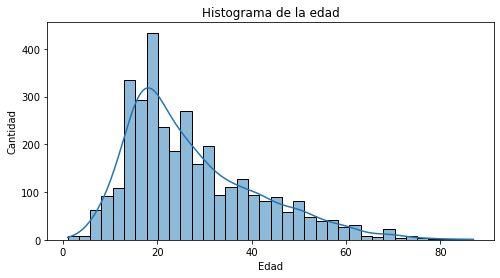

In [5]:
plt.figure(figsize =(8,4))
fig = sns.histplot(x=df["age_2"], kde = True)
fig.set(xlabel='Edad', ylabel = 'Cantidad')
fig.set_title('Histograma de la edad')
plt.show()

In [6]:
imputer = SimpleImputer(missing_values= np.nan, strategy = "median" ) 

In [7]:
imputer = imputer.fit(df[["age_2"]])

In [8]:
df["age_2"] = imputer.transform(df[["age_2"]])

Comprobamos que han desaparecido los nulos de la columna

In [9]:
df["age_2"]

0       24.0
1       24.0
2       24.0
3       24.0
4       24.0
        ... 
6279    24.0
6280    24.0
6281    24.0
6282    24.0
6283    24.0
Name: age_2, Length: 6281, dtype: float64

In [10]:
df["age_2"].isnull().sum()

0

Observamos que la columna age ha cambiado los nulos por el valor de la mediana de esa misma columna, por lo tanto ahora la columna age no tiene valores nulos.

- Reemplazad los valores nulos de la columna *'sexo'* por la moda, usando el método SimpleImputer.

In [11]:
imputer = SimpleImputer(missing_values= np.nan, strategy = "most_frequent" )     

In [12]:
imputer = imputer.fit(df[["sexo"]])

In [13]:
df["sexo"] = imputer.transform(df[["sexo"]])

In [14]:
df["sexo"]

0       F
1       M
2       M
3       F
4       M
       ..
6279    M
6280    M
6281    M
6282    M
6283    M
Name: sexo, Length: 6281, dtype: object

In [15]:
df["sexo"].isnull().sum()

0

- Reemplazad los valores nulos de la columna type por el valor más frecuente (la moda) con el método SimpleImputer.

In [16]:
imputer = SimpleImputer(missing_values= np.nan, strategy = "most_frequent")

In [17]:
imputer = imputer.fit(df[["type_2"]])

In [18]:
df["type_2"] = imputer.transform(df[["type_2"]])

In [19]:
df["type_2"].isnull().sum()

0

Comprobamos que ya no existen valores nulos en la columna type. Todos los nulos se han reemplazado por el valor de la moda.

- Utilizad el método **KNN** **Imputer** para reemplazar todos los valores nulos de las columnas numéricas.

In [31]:
df_numericas = df.select_dtypes(exclude= 'object')                       
df_numericas.head(2)

,year,age,age_2
0,1800,27.37,24.0
1,1797,27.37,24.0


In [23]:
df_year = df['year']

In [33]:
imputerKNN = KNNImputer(n_neighbors=5)
imputerKNN.fit(df_numericas)

KNNImputer()

In [34]:
imputerKNN.fit(df_numericas)

KNNImputer()

In [35]:
numericas_KNN = imputerKNN.transform(df_numericas)


 - Utilizad el método **Iterative Imputer** para reemplazar todos los valores nulos de las columnas numéricas.

In [26]:
imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')


In [27]:
imputer.fit(df_numericas)

IterativeImputer()

In [28]:
imputer.transform(df_numericas)

array([[1800.  ,   27.37,   24.  ],
       [1797.  ,   27.37,   24.  ],
       [1792.  ,   27.37,   24.  ],
       ...,
       [1803.  ,   27.37,   24.  ],
       [1802.  ,   27.37,   24.  ],
       [1801.  ,   27.37,   24.  ]])

In [30]:
df_numericas.isnull().sum()

year     0
age      0
age_2    0
dtype: int64

- ¿Podríais explicar que diferencia hay entre estos dos últimos métodos?

Ambos son métodos para reemplazar nulos. Las diferencias entre IterativeImputer y KNNImputer es que InterativeImputer los reemplaza en base a las columnas del df y el KNNInputer en base a los vecinos más próximos. 


IterativeImputer elige un valor para los nulos en relación al df. Elegimos un estadístico (media, mediana...) y estima el valor a reemplazar en base a ese estadístico.

KNNImputer clasifica cada uno de los datos comparando ese dato y su similitud entre sus vecinos más próximos.

- Por último , verificamos que no tenemos nulos en esas columnas.

In [36]:
df.isnull().sum()

case_number       1
year              0
type              4
country           0
area            453
location        537
activity        540
name            209
age               0
species           0
injury           28
fecha_limpia      0
fatal_limpio      0
sexo              0
age_2             0
type_2            0
dtype: int64

# Ejercicio 2. Guardad el csv para seguir trabajando con el en los siguientes ejercicios de pair

In [28]:
df.to_csv("pairs_limpieza.csv")